<a href="https://colab.research.google.com/github/Jvargas442/Ciencia-de-datos/blob/main/Taller%20EDA%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wquantiles

In [2]:
!pip install statsmodels

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('titanic-train.csv')

In [4]:
print(df.info())
print(df.describe())
print(df.describe(include=['O']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

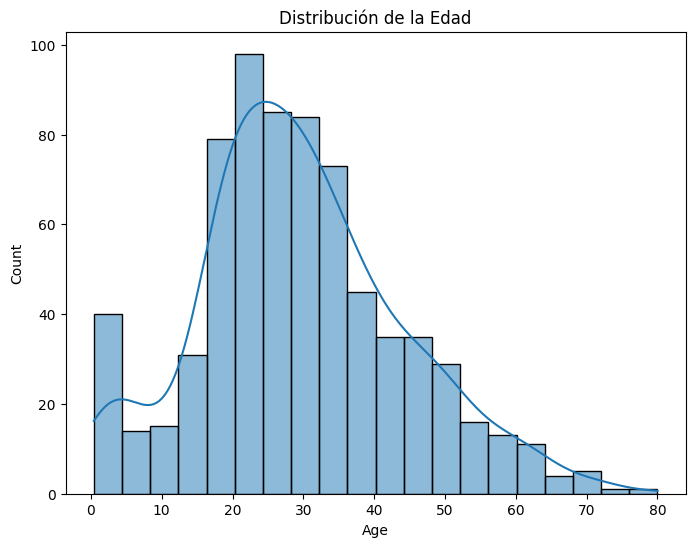

In [5]:
# Histograma de la edad
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Distribución de la Edad')
plt.show()

In [6]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
total=df.isnull().sum().sort_values(ascending=False)
total

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [9]:
df.isnull().count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,891
SibSp,891
Parch,891
Ticket,891
Fare,891


In [10]:
porcentajes=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
porcentajes

,0
Cabin,0.771044
Age,0.198653
Embarked,0.002245
PassengerId,0.000000
Name,0.000000
Pclass,0.000000
Survived,0.000000
Sex,0.000000
Parch,0.000000
SibSp,0.000000


In [11]:
datos_perdidos=pd.concat([total,porcentajes],axis=1,keys=['Total','Porcentaje'])
datos_perdidos

,Total,Porcentaje
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


In [12]:
def plot_learning_curve(estimator,title,X,y,xlim=None,cv=None,n_jobs=1,train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de entrenamiento")
    plt.ylabel("Puntuación de validación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Puntuación de entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntuación de validación")

    plt.legend(loc="best")
    return plt

In [13]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [17]:
def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead =  df[df['Survived']==0][feature].value_counts()
    test = pd.DataFrame([survived,dead])
    test.index = ['Sobrevivientes','Fallecidos']
    test.plot(kind='bar',stacked=True, figsize=(10,5))

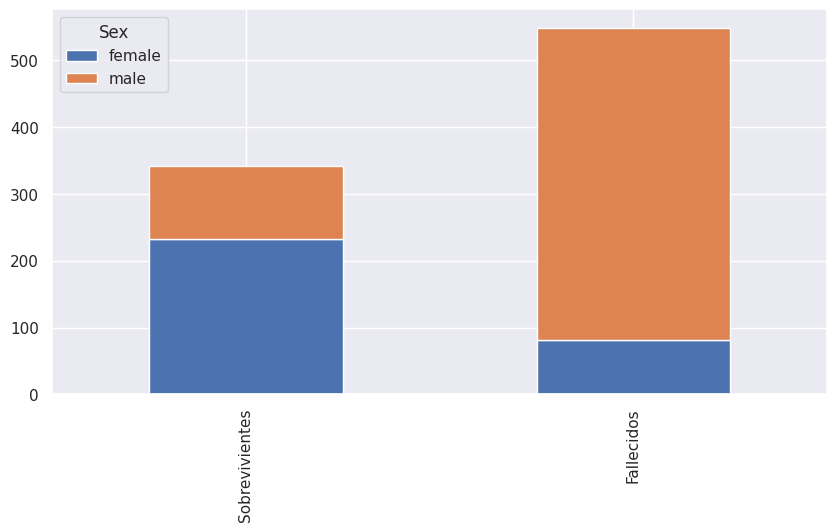

In [18]:
bar_chart('Sex')

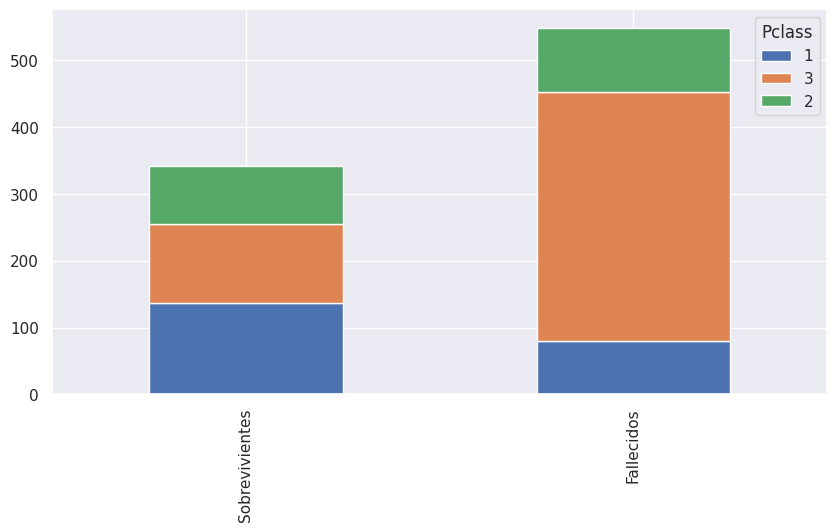

In [19]:
bar_chart('Pclass')

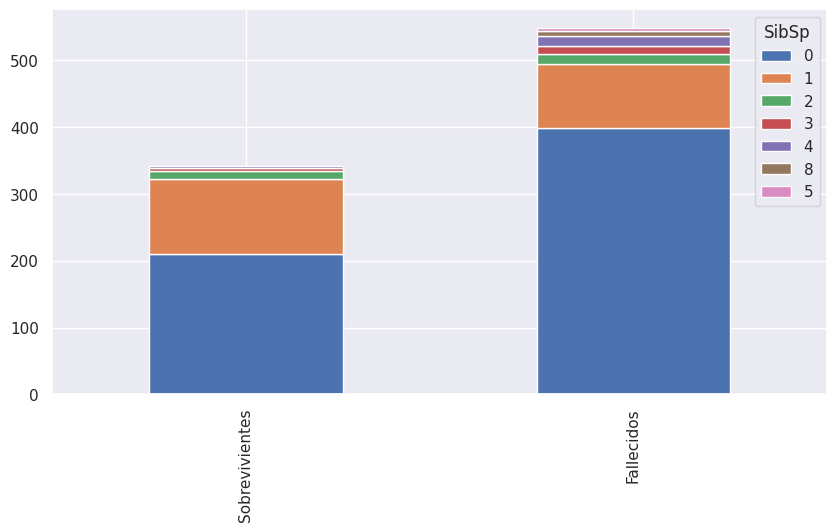

In [20]:
bar_chart('SibSp')

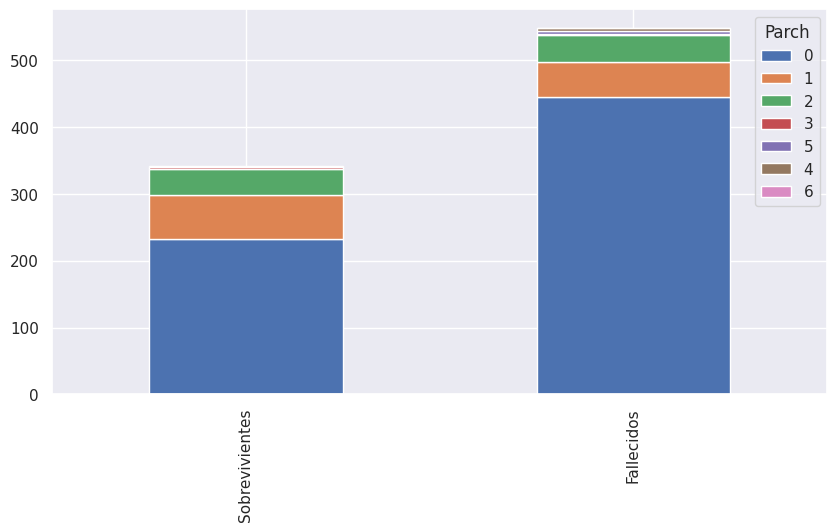

In [21]:
bar_chart('Parch')

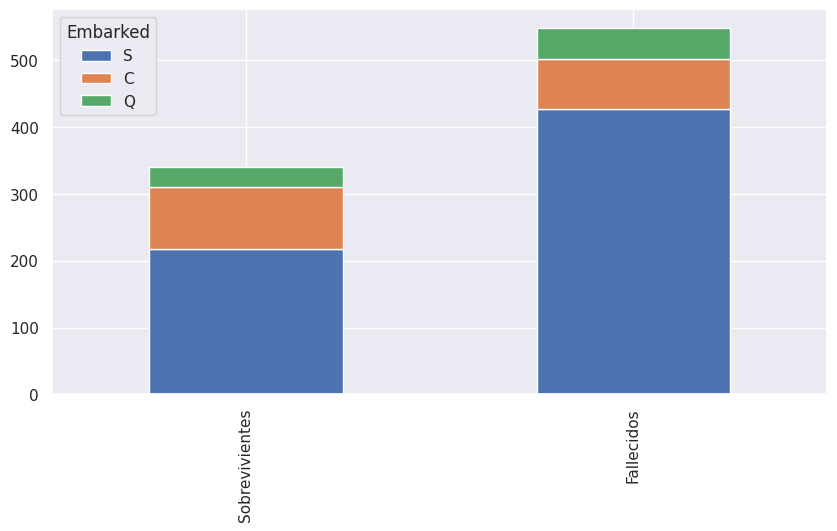

In [22]:
bar_chart('Embarked')

In [23]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
def extract_title(data):
    titles=data["Name"].str.extract('([A-Za-z]+)\.',expand=True)
    return titles

In [26]:
df["Title"]=extract_title(df)

In [27]:
df["Title"].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [28]:
def replace_titles(data):
  title_mapping = {"Mr": "Señor", "Miss": 'Señorita', "Mrs": "Señora"}
  data['Title'] = data['Title'].map(title_mapping).fillna("Otros")
  return data

In [29]:
df=replace_titles(df)
df[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Señor
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Señora
2,"Heikkinen, Miss. Laina",Señorita
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Señora
4,"Allen, Mr. William Henry",Señor


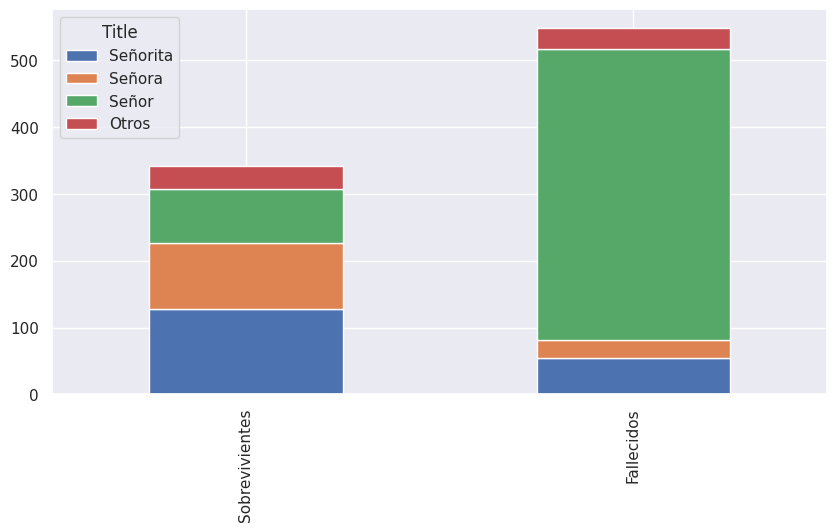

In [30]:
bar_chart("Title")

In [31]:
#Eliminando información innecesaria del dataset
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Señor
1,2,1,1,female,38.0,1,0,71.2833,C,Señora
2,3,1,3,female,26.0,0,0,7.9250,S,Señorita
3,4,1,1,female,35.0,1,0,53.1000,S,Señora
4,5,0,3,male,35.0,0,0,8.0500,S,Señor


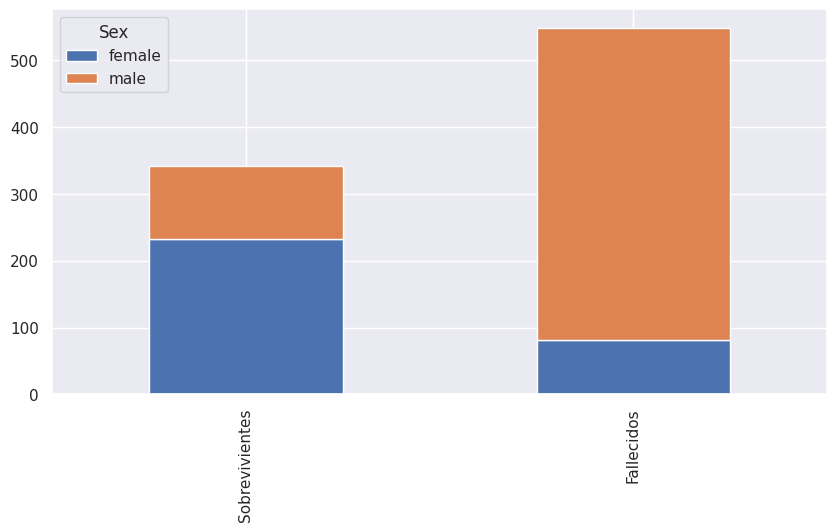

In [33]:
bar_chart("Sex")

In [34]:
title_age_means = df.groupby('Title')['Age'].mean()
title_age_means

,Age
Title,
Otros,20.430161
Señor,32.368090
Señora,35.898148
Señorita,21.773973


In [35]:
df['Age'] = df.apply(lambda row: title_age_means[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)

In [36]:
df[['Title', 'Age']].head(30)

,Title,Age
0,Señor,22.000000
1,Señora,38.000000
2,Señorita,26.000000
3,Señora,35.000000
4,Señor,35.000000
5,Señor,32.368090
6,Señor,54.000000
7,Otros,2.000000
8,Señora,27.000000
9,Señora,14.000000


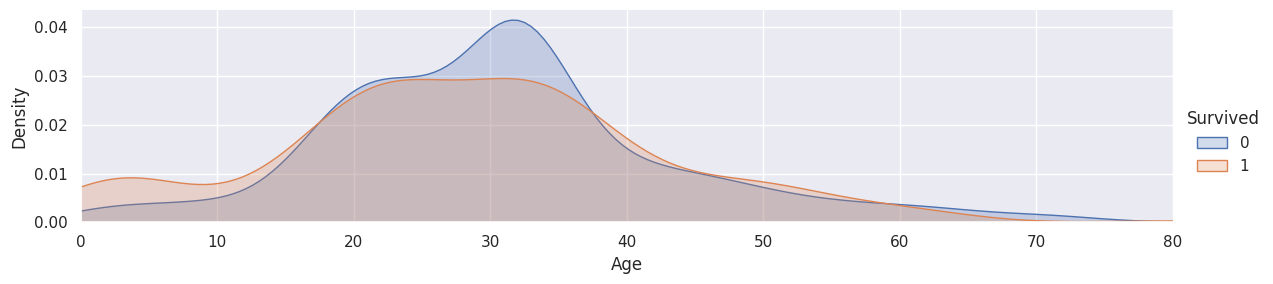

In [37]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

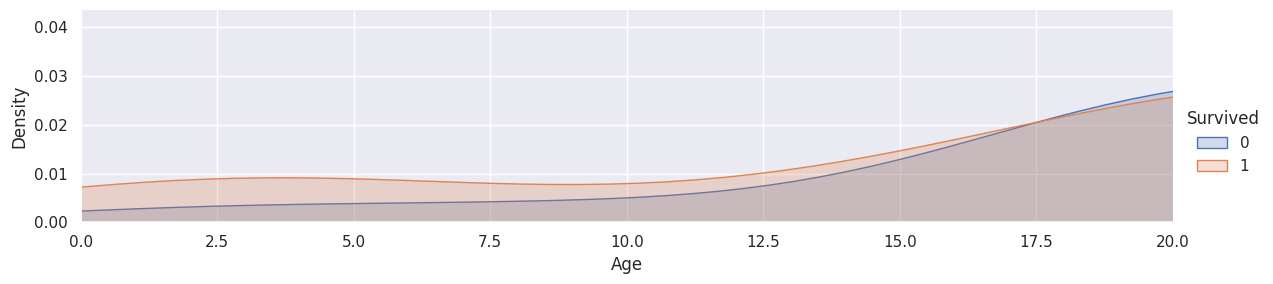

In [38]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
 9   Title        891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [40]:
df['Age_Category'] = pd.cut(df['Age'], bins=[0, 16, 26, 36, 62, float('inf')], labels=[0, 1, 2, 3, 4], right=False)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_Category
0,1,0,3,male,22.0,1,0,7.2500,S,Señor,1
1,2,1,1,female,38.0,1,0,71.2833,C,Señora,3
2,3,1,3,female,26.0,0,0,7.9250,S,Señorita,2
3,4,1,1,female,35.0,1,0,53.1000,S,Señora,2
4,5,0,3,male,35.0,0,0,8.0500,S,Señor,2


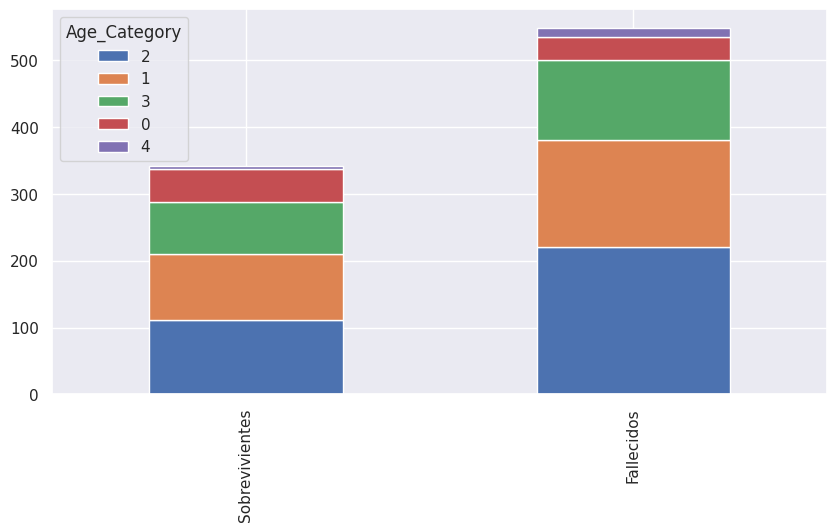

In [42]:
bar_chart("Age_Category")

In [48]:
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(embarked_mode)

In [49]:
print("Valores nulos después:", df['Embarked'].isnull().sum())


Valores nulos después: 0


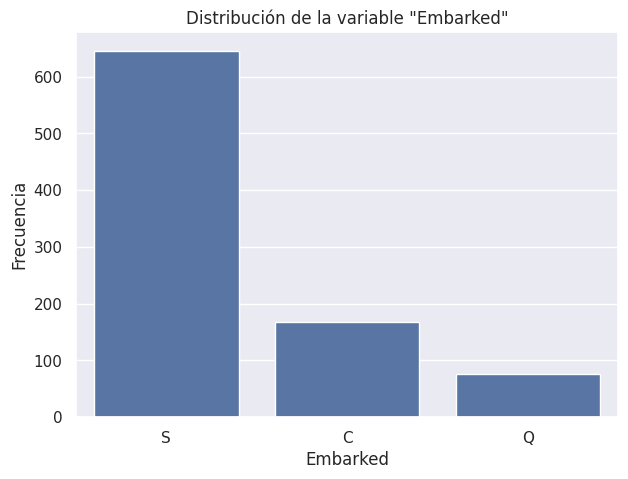

In [51]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Embarked', order=['S', 'C', 'Q'])
plt.title('Distribución de la variable "Embarked"')
plt.xlabel('Embarked')
plt.ylabel('Frecuencia')
plt.show()

### Justificacion
Porque es el valor más representativo.

Mantiene la distribución original.

Es una técnica sencilla que no introduce categorías nuevas.

### Analisis
La mayoría de los pasajeros embarcaron en Southampton (S), lo cual es consistente con la historia del Titanic, ya que fue el puerto principal de salida.

Cherbourg (C) y Queenstown (Q) tuvieron menos frecuencia, siendo Queenstown el de menor volumen de embarque.

Esta distribución sesgada hacia "S" sugiere que futuras imputaciones con la moda tienen un bajo impacto en el análisis, debido a la fuerte dominancia de esta categoría.